In [1]:
import pandas as pd
import numpy as np
# for plotting graphs
import matplotlib.pyplot as plt 

# %matplotlib inline renders plot inline 
%matplotlib inline

df=pd.read_csv('SepticShockSingleValue.csv')
df.head(10)

,Unnamed: 0,Resp,Patient_ID,BaseExcess,AlkalinePhos,Lactate,pH,PaCO2,HCO3,Creatinine,...,Potassium,TroponinI,Hct,Hgb,PTT,Fibrinogen,Platelets,Age,Gender,SepsisLabel
0,0,24.0,100013,0.0,96.0,3.18,7.49,29.0,0.0,3.03,...,5.60,0.00,32.8,10.8,0.00,0.0,139.0,89.0,1,1
1,1,17.0,100016,0.0,85.0,5.13,7.27,43.1,0.0,9.87,...,5.20,1.91,36.0,11.4,161.65,201.0,195.0,56.0,0,1
2,2,18.0,100047,0.0,0.0,6.22,7.41,38.5,0.0,1.10,...,3.78,0.00,26.3,8.9,32.40,0.0,113.0,45.0,1,1
3,3,23.0,100049,0.0,71.0,1.34,0.00,0.0,0.0,0.44,...,3.00,0.01,37.9,12.0,32.60,0.0,395.0,60.0,0,1
4,4,0.0,100055,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,1
5,5,18.0,100068,-1.9,0.0,1.15,7.28,56.0,0.0,0.98,...,3.50,0.01,40.0,12.7,0.00,0.0,166.0,61.0,1,1
6,6,24.0,100072,0.0,0.0,2.03,7.19,52.0,0.0,1.53,...,5.80,200.00,36.5,11.5,60.20,0.0,406.0,57.0,0,1
7,7,4.0,100073,0.0,50.0,0.00,0.00,0.0,0.0,0.89,...,4.00,0.01,37.6,12.5,0.00,0.0,166.0,50.0,1,1
8,8,14.0,100088,0.0,0.0,2.94,7.34,34.9,0.0,1.17,...,3.80,0.00,29.0,9.7,249.90,0.0,118.0,68.0,1,1
9,9,21.0,100100,0.0,0.0,0.00,0.00,0.0,0.0,1.00,...,3.40,0.00,36.5,12.2,0.00,0.0,259.0,68.0,1,1


In [2]:
# Number of unique patients in this set
len(pd.unique(df['Patient_ID']))

2932

In [3]:
# Replcae "0" values with NaN
df = df.replace(0, np.nan)
df.isnull().sum()

Unnamed: 0             1
Resp                 512
Patient_ID             0
BaseExcess          1898
AlkalinePhos        1768
Lactate             1589
pH                  1237
PaCO2               1263
HCO3                1542
Creatinine           835
Phosphate           1080
BUN                  818
Bilirubin_total     1771
WBC                  835
HR                   493
O2Sat                498
Temp                 609
SBP                  621
MAP                  494
DBP                  965
EtCO2               2557
FiO2                1245
SaO2                1849
AST                 1760
Calcium              886
Chloride            1430
Bilirubin_direct    2704
Glucose              731
Magnesium            880
Potassium            770
TroponinI           2583
Hct                  787
Hgb                  821
PTT                 1393
Fibrinogen          2473
Platelets            844
Age                  426
Gender              1444
SepsisLabel            0
dtype: int64

<AxesSubplot:>

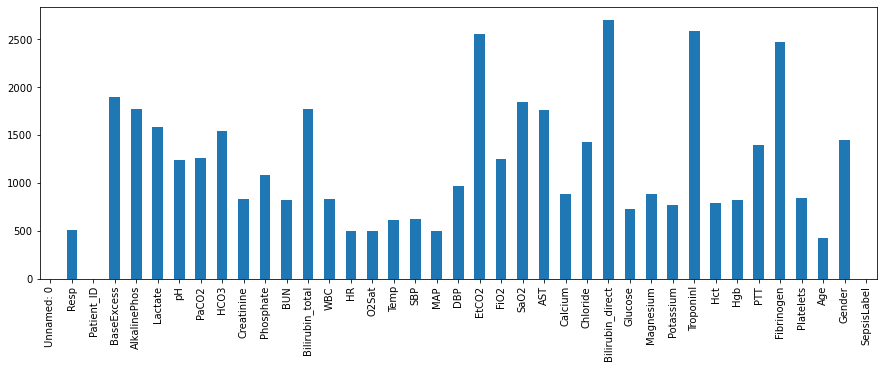

In [4]:
df.isnull().sum().plot.bar(figsize=(15,5))

In [5]:
# SIRS Score Conditions

SIRS_Temp=(df['Temp']>38) |( df['Temp']<36)
SIRS_HR=(df['HR']>90)
SIRS_Resp=(df['Resp']>20) |( df['PaCO2']<32)
SIRS_WBC=(df['WBC']>12000) |( df['WBC']<4000)

df['SIRS_Score']=np.where(SIRS_Temp, 1, 0)+np.where(SIRS_HR, 1, 0)+np.where(SIRS_Resp, 1, 0)+np.where(SIRS_WBC, 1, 0)

df['SIRS_Score'].value_counts()

2    936
1    735
0    594
3    554
4    113
Name: SIRS_Score, dtype: int64

<AxesSubplot:>

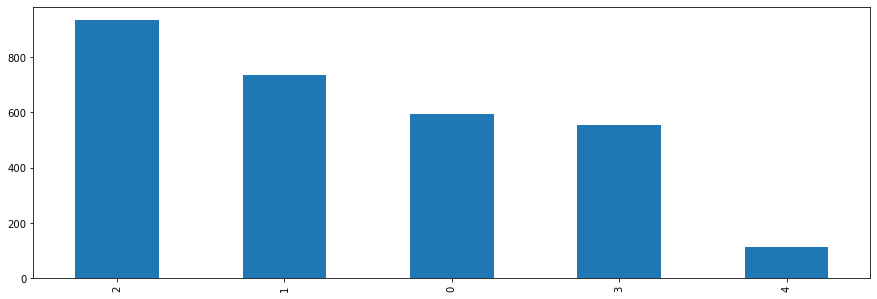

In [6]:
df['SIRS_Score'].value_counts().plot.bar(figsize=(15,5))

In [7]:

SIRS_Yes=df['SIRS_Score']>1
# SIRS_No=df['SIRS_Score']<2

df['Shock_Stage1']=np.where(SIRS_Yes, 1, 0)

df.head(5)


,Unnamed: 0,Resp,Patient_ID,BaseExcess,AlkalinePhos,Lactate,pH,PaCO2,HCO3,Creatinine,...,Hct,Hgb,PTT,Fibrinogen,Platelets,Age,Gender,SepsisLabel,SIRS_Score,Shock_Stage1
0,NaN,24.0,100013,NaN,96.0,3.18,7.49,29.0,NaN,3.03,...,32.8,10.8,NaN,NaN,139.0,89.0,1.0,1,3,1
1,1.0,17.0,100016,NaN,85.0,5.13,7.27,43.1,NaN,9.87,...,36.0,11.4,161.65,201.0,195.0,56.0,NaN,1,1,0
2,2.0,18.0,100047,NaN,NaN,6.22,7.41,38.5,NaN,1.10,...,26.3,8.9,32.40,NaN,113.0,45.0,1.0,1,2,1
3,3.0,23.0,100049,NaN,71.0,1.34,NaN,NaN,NaN,0.44,...,37.9,12.0,32.60,NaN,395.0,60.0,NaN,1,2,1
4,4.0,NaN,100055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [8]:
df['Shock_Stage1'].value_counts()

1    1603
0    1329
Name: Shock_Stage1, dtype: int64

<AxesSubplot:>

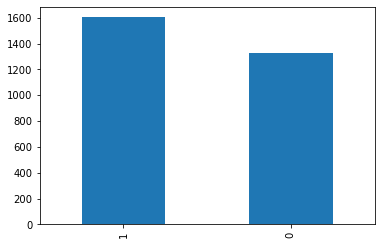

In [9]:
df['Shock_Stage1'].value_counts().plot.bar()

In [10]:
resp_Acidosis=(df['pH']<7.4) & ( df['PaCO2']>45) & ((df['HCO3']>21) | (df['HCO3']<27))
resp_Alkalosis=(df['pH']>7.4) & (df['PaCO2']<35) & ((df['HCO3']>21) | (df['HCO3']<27))
meta_Acidosis=(df['pH']<7.4) & ( df['HCO3']<22) & ((df['PaCO2']>34) | (df['PaCO2']<46))
meta_Alkalosis=(df['pH']>7.4) & (df['HCO3']>26)

resp_Acidosis_Comp=(df['pH']<7.4) & ( df['PaCO2']>45) & (df['HCO3']>26)
resp_Alkalosis_Comp=(df['pH']>7.4) & (df['PaCO2']<35) & (df['HCO3']<22)
meta_Acidosis_Comp=(df['pH']<7.4) & ( df['HCO3']<22) & (df['PaCO2']<35)
meta_Alkalosis_Comp=(df['pH']>7.4) & (df['HCO3']>26) & (df['PaCO2']>45)


df.loc[resp_Acidosis, 'ABG_Anal'] = 'RAC'
df.loc[resp_Alkalosis, 'ABG_Anal'] = 'RALK'
df.loc[meta_Acidosis, 'ABG_Anal'] = 'MAC'
df.loc[meta_Alkalosis, 'ABG_Anal'] = 'MALK'

df.loc[resp_Acidosis_Comp, 'ABG_Anal'] = 'CRAC'
df.loc[resp_Alkalosis_Comp, 'ABG_Anal'] = 'CRALK'
df.loc[meta_Acidosis_Comp, 'ABG_Anal'] = 'CMAC'
df.loc[meta_Alkalosis_Comp, 'ABG_Anal'] = 'CMALK'
    
# df['ABG_Anal']=np.where(resp_Acidosis, 'RAC', np.nan)
# df['ABG_Anal']=np.where(resp_Alkalosis, 'RAL', np.nan)
# df['Resp_Alk']=np.where(resp_Alkalosis, 1, 0)
# df['Meta_Acid']=np.where(meta_Acidosis, 1, 0)
# df['Meta_Alk']=np.where(meta_Alkalosis, 1, 0)

df['ABG_Anal'].value_counts()


MAC      230
RAC      108
MALK      92
CRAC      79
CMAC      74
RALK      67
CRALK     64
CMALK     30
Name: ABG_Anal, dtype: int64

<AxesSubplot:>

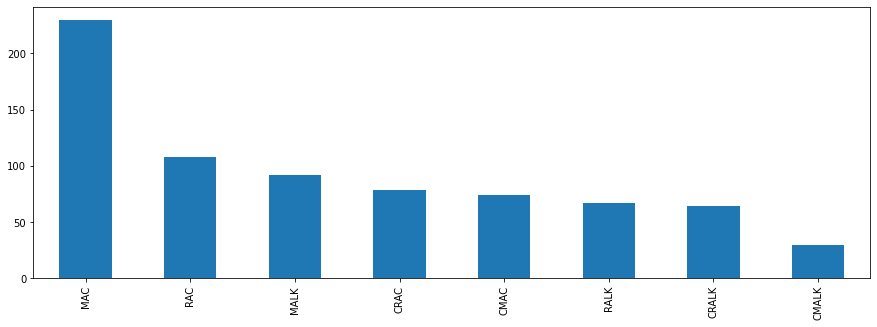

In [11]:
df['ABG_Anal'].value_counts().plot.bar(figsize=(15,5))

(6.5, -0.5)

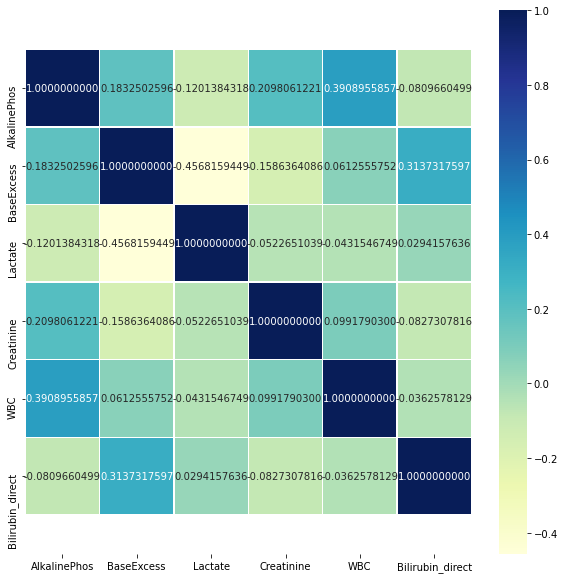

In [29]:
# List of patient IDs that had Metabolic Acidosis when checked in to ICU
MAC_PatientID=df['Patient_ID'][df['ABG_Anal']== 'MAC'].unique()
# Dataframe of values for patients who had Metabolic Acidosis when they checked in to ICU
df_MAC=df[df.Patient_ID.isin(MAC_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Metabolic Acidosis
import seaborn as sns 

corr_matrix = df_MAC[['AlkalinePhos','BaseExcess','Lactate', 'Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

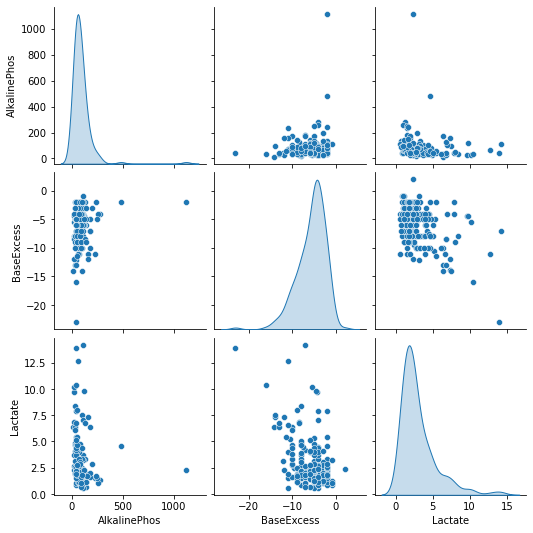

In [13]:
sns_MAC = sns.pairplot(df_MAC, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

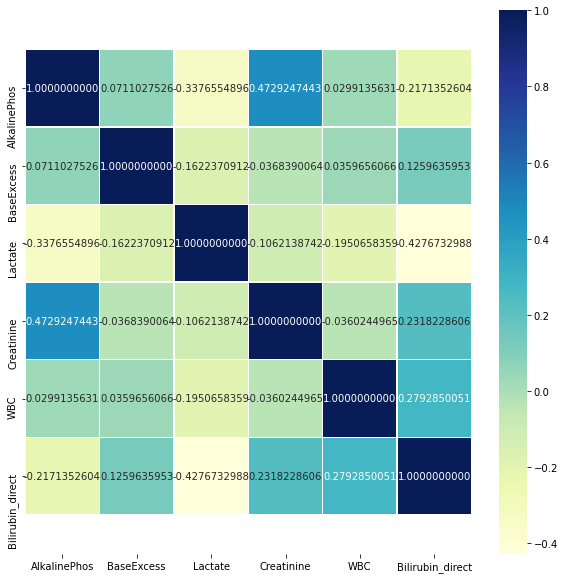

In [31]:
# List of patient IDs that had Respiratory Acidosis when checked in to ICU
RAC_PatientID=df['Patient_ID'][df['ABG_Anal']== 'RAC'].unique()
# Dataframe of values for patients who had Respiratory Acidosis when they checked in to ICU
df_RAC=df[df.Patient_ID.isin(RAC_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Respiratory Acidosis

corr_matrix = df_RAC[['AlkalinePhos','BaseExcess','Lactate','Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

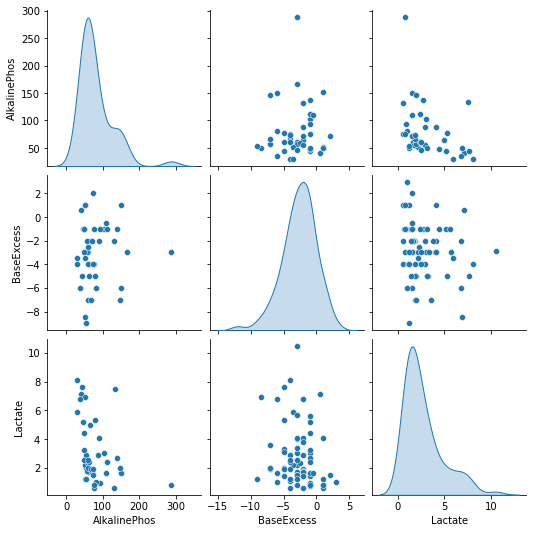

In [15]:
sns_RAC = sns.pairplot(df_RAC, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

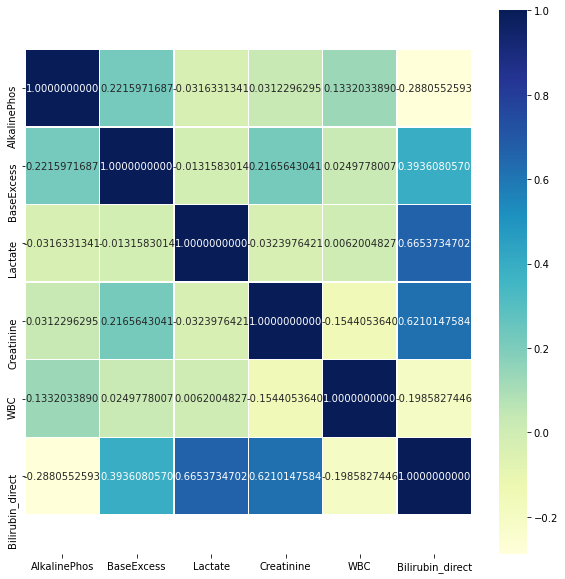

In [32]:
# List of patient IDs that had Metabolic Alkalosis when checked in to ICU
MALK_PatientID=df['Patient_ID'][df['ABG_Anal']== 'MALK'].unique()
# Dataframe of values for patients who had Metabolic Alkalosis when they checked in to ICU
df_MALK=df[df.Patient_ID.isin(MALK_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Metabolic Alkalosis 

corr_matrix = df_MALK[['AlkalinePhos','BaseExcess','Lactate','Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

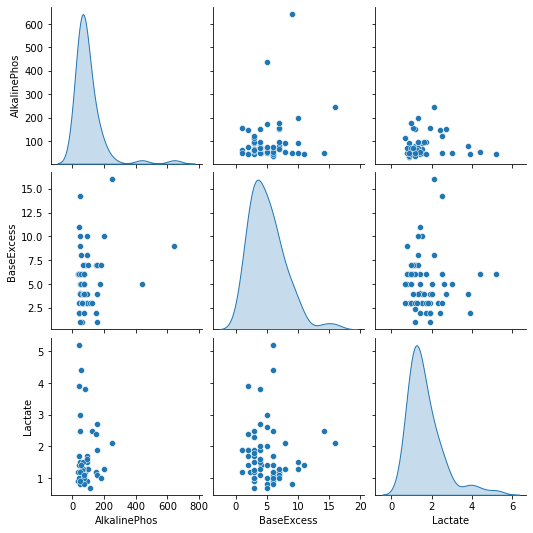

In [17]:
sns_MALK = sns.pairplot(df_MALK, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

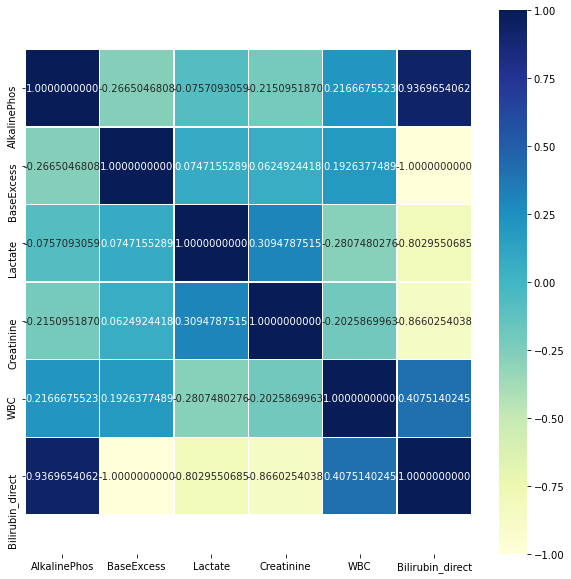

In [30]:
# List of patient IDs that had Respiratory Alkalosis when checked in to ICU
RALK_PatientID=df['Patient_ID'][df['ABG_Anal']== 'RALK'].unique()
# Dataframe of values for patients who had Respiratory Alkalosis when they checked in to ICU
df_RALK=df[df.Patient_ID.isin(RALK_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Respiratory Alkalosis 

corr_matrix = df_RALK[['AlkalinePhos','BaseExcess','Lactate', 'Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

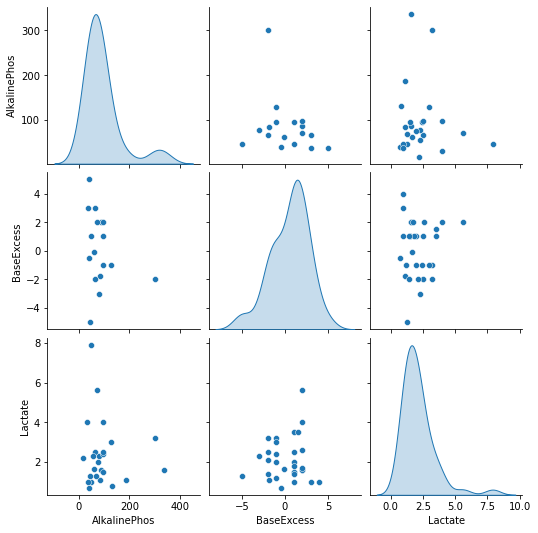

In [19]:
sns_RALK = sns.pairplot(df_RALK, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

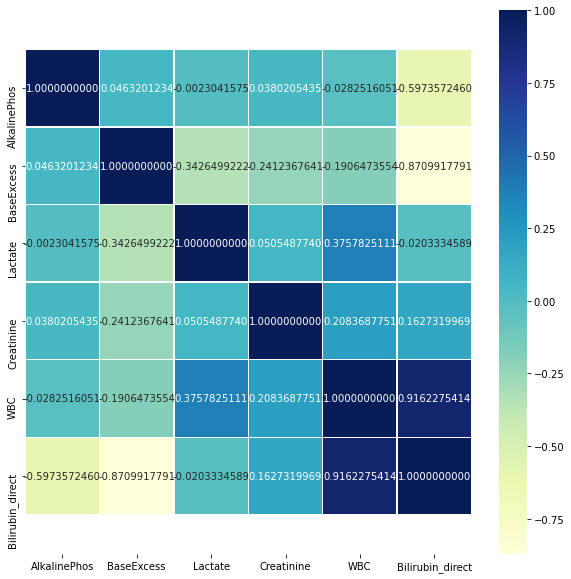

In [33]:
# List of patient IDs that had Compensated Metabolic Acidosis when checked in to ICU
CMAC_PatientID=df['Patient_ID'][df['ABG_Anal']== 'CMAC'].unique()
# Dataframe of values for patients who had Compensated Metabolic Acidosis when they checked in to ICU
df_CMAC=df[df.Patient_ID.isin(CMAC_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Compensated Metabolic Acidosis
import seaborn as sns 

corr_matrix = df_CMAC[['AlkalinePhos','BaseExcess','Lactate','Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

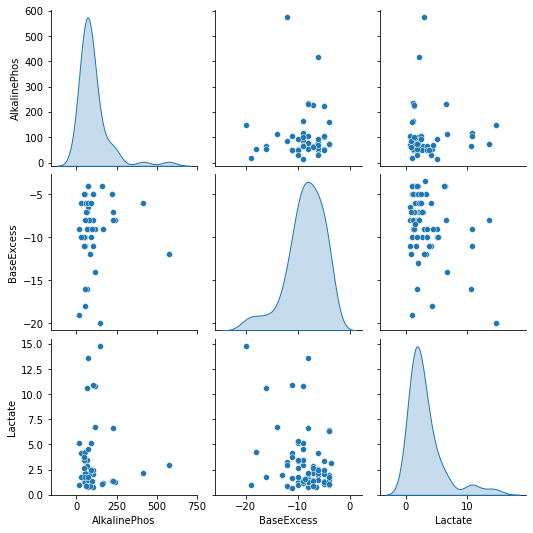

In [21]:
sns_CMAC = sns.pairplot(df_CMAC, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

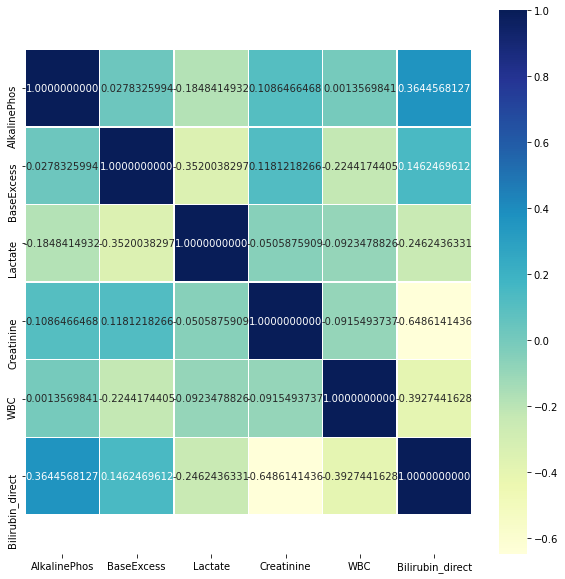

In [34]:
# List of patient IDs that had Compensated Respiratory Acidosis when checked in to ICU
CRAC_PatientID=df['Patient_ID'][df['ABG_Anal']== 'CRAC'].unique()
# Dataframe of values for patients who had Compensated Respiratory Acidosis when they checked in to ICU
df_CRAC=df[df.Patient_ID.isin(CRAC_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Compensated Respiratory Acidosis

corr_matrix = df_CRAC[['AlkalinePhos','BaseExcess','Lactate','Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

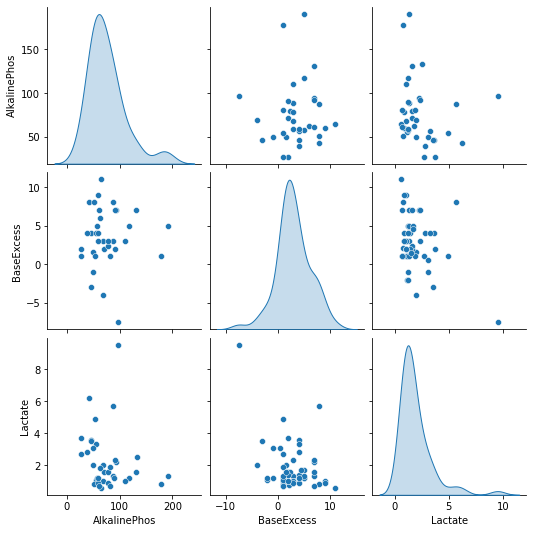

In [23]:
sns_CRAC = sns.pairplot(df_CRAC, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

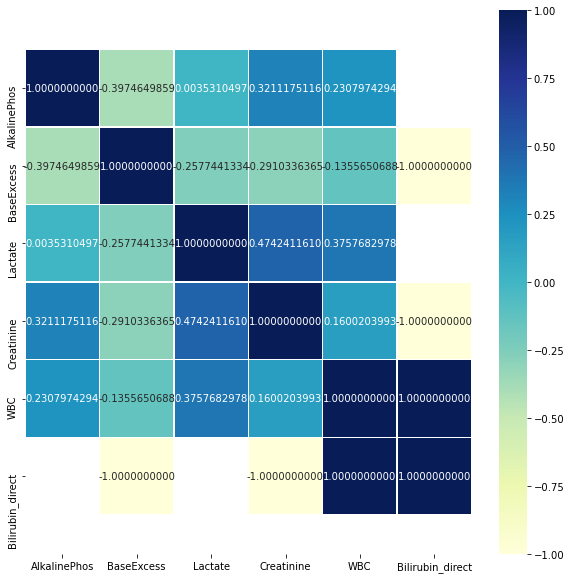

In [35]:
# List of patient IDs that had Compensated Metabolic Alkalosis when checked in to ICU
CMALK_PatientID=df['Patient_ID'][df['ABG_Anal']== 'CMALK'].unique()
# Dataframe of values for patients who had Metabolic Alkalosis when they checked in to ICU
df_CMALK=df[df.Patient_ID.isin(CMALK_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Compensated Metabolic Alkalosis 

corr_matrix = df_CMALK[['AlkalinePhos','BaseExcess','Lactate', 'Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

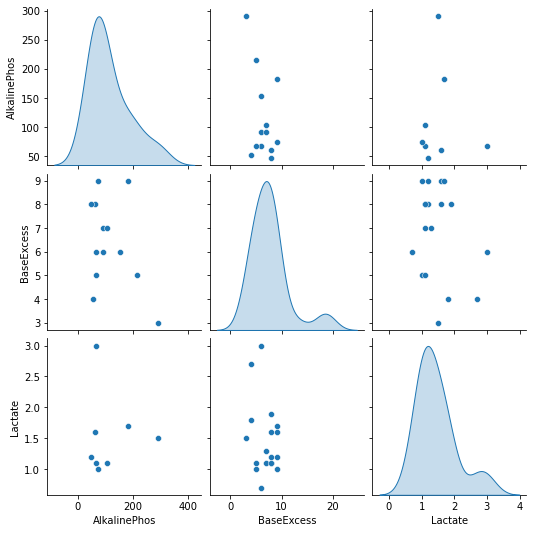

In [25]:
sns_CMALK = sns.pairplot(df_CMALK, vars=['AlkalinePhos','BaseExcess','Lactate'], diag_kind = 'kde')

(6.5, -0.5)

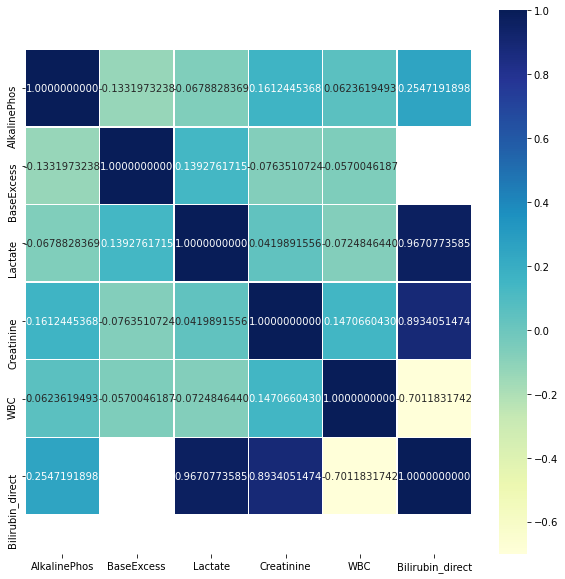

In [36]:
# List of patient IDs that had Compensated Respiratory Alkalosis when checked in to ICU
CRALK_PatientID=df['Patient_ID'][df['ABG_Anal']== 'CRALK'].unique()
# Dataframe of values for patients who had Compensated Respiratory Alkalosis when they checked in to ICU
df_CRALK=df[df.Patient_ID.isin(CRALK_PatientID)]


# Correlation between AlkalinePhosphate, Base Excess and Lactate for patients who had Compensated Respiratory Alkalosis 

corr_matrix = df_CRALK[['AlkalinePhos','BaseExcess','Lactate','Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

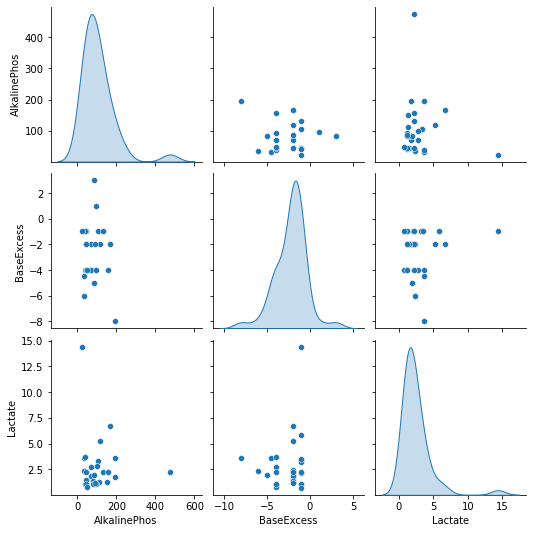

In [27]:
sns_CRALK = sns.pairplot(df_CRALK, vars=['AlkalinePhos','BaseExcess','Lactate'],diag_kind = 'kde')